In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import os



In [5]:
# Define the path to the CSV file
csv_path = "./NIFTY-50 data/TATAMOTORS.csv"

# Get the file name from the path
csv_file_name = os.path.basename(csv_path)
filename_without_extension = os.path.splitext(os.path.basename(csv_file_name))[0]

# Print the file name
print(filename_without_extension)

df = pd.read_csv(csv_path)
print(df.shape)
df.head()

TATAMOTORS
(5306, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
1,2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2,2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
3,2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
4,2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


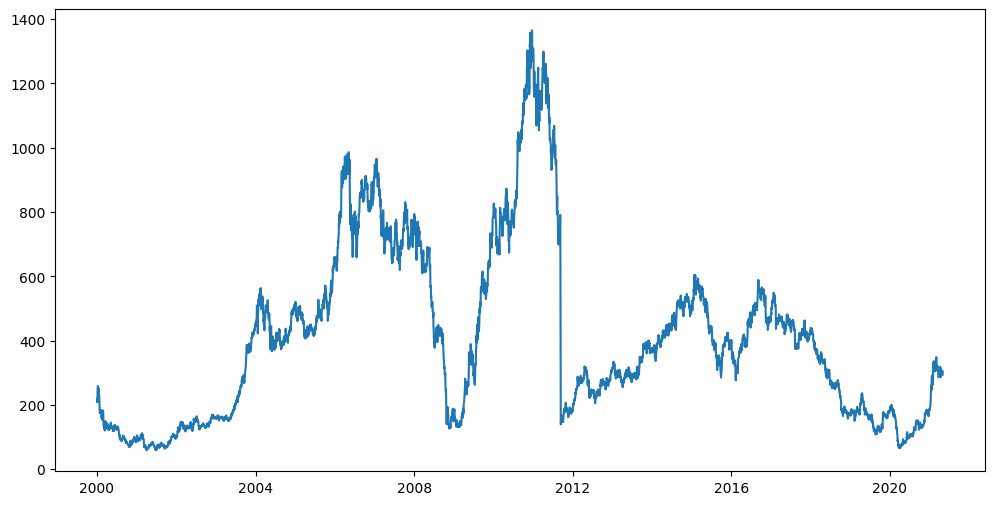

In [6]:
# Converting dates to Y-M-D format and putting it back to df.Date
df.Date = pd.to_datetime(df.Date,format="%Y-%m-%d")
# This is done so that Matplotlib knows to treat the Date column as the x-axis of the plot.
df.index = df.Date

# 16 inches wide by 8 inches tall) for the plot.
plt.figure(figsize=(12,6))
# plotting closing price with dates
plt.plot(df.Close,label="Close Price History")

In [7]:
data = df.sort_index(ascending=True,axis=0)
new_dataset = pd.DataFrame(index=range(len(df)),columns=["Date","Close"])
for i in range(len(df)):
    new_dataset["Date"][i] = data["Date"][i]
    new_dataset["Close"][i] = data["Close"][i]
new_dataset.tail()

,Date,Close
5301,2021-04-26 00:00:00,295.4
5302,2021-04-27 00:00:00,301.5
5303,2021-04-28 00:00:00,305.9
5304,2021-04-29 00:00:00,301.9
5305,2021-04-30 00:00:00,293.85


In [8]:
final_dataset = new_dataset.drop("Date",axis=1)

In [9]:
final_dataset.head()

,Close
0,216.75
1,208.2
2,213.25
3,222.1
4,239.9


In [10]:
train_data=pd.DataFrame(new_dataset["Close"][0:int(len(new_dataset)*0.7)])
valid_data=pd.DataFrame(new_dataset["Close"][int(len(new_dataset)*0.7):int(len(new_dataset))])

print(f"Length of Train data is {len(train_data)} and Length of valid data is {len(valid_data)} and both are array")

Length of Train data is 3714 and Length of valid data is 1592 and both are array


In [11]:
train_data.tail()

,Close
3709,541.6
3710,529.5
3711,524.75
3712,531.0
3713,526.4


In [12]:
# # NORMALIZING DATASET
# final_dataset=new_dataset.values

# # final_dataset is a 2D array and new_dataset is a dataframe of 2 columns
# print(final_dataset[0])

In [13]:
# # Setting index to date and dropping the Date column
# new_dataset.index=new_dataset.Date
# new_dataset.drop("Date",axis=1,inplace=True)


In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
train_scaled_array=scaler.fit_transform(train_data)


In [15]:
print(train_scaled_array.shape)
train_scaled_array

(3714, 1)


array([[0.1209094 ],
       [0.11436445],
       [0.11823018],
       ...,
       [0.35668083],
       [0.36146515],
       [0.35794389]])

In [16]:
# TIME SERIES ANALOGY
x_train_data,y_train_data=[],[]
# 60th day data depends on previous 59 days
# this creates a x_train_data having 60 inputs (columns = 60) in a row and then shift by 1 
# and y_train_data has a column of all close values in list
for i in range(60,train_scaled_array.shape[0]):
    x_train_data.append(train_scaled_array[i-60:i,0])
    y_train_data.append(train_scaled_array[i,0])
    

In [17]:
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
print(f"Shape of x_train_data = {x_train_data.shape} and y_train_data = {y_train_data.shape}")

Shape of x_train_data = (3654, 60) and y_train_data = (3654,)


In [18]:

# x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
# x_train_data.shape

In [19]:
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(x_train_data.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(1))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

APPENDING LAST 59 DATAS OF TRAIN TO TEST DATA AND SCALING ALL OF THEM

In [21]:
valid_data.head()
valid_data.shape

(1592, 1)

In [22]:

# TO PREDICT 864TH Close value we need its previous 59 values and append to this data frame
test_data = train_data.tail(60)
test_data.shape


(60, 1)

In [23]:
test_data = test_data.append(valid_data,ignore_index=True)
test_data.shape

C:\Users\Satyajeet\AppData\Local\Temp\ipykernel_10756\1326513460.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_data = test_data.append(valid_data,ignore_index=True)


(1652, 1)

In [24]:
# Scaling
input_data = scaler.fit_transform(test_data)
input_data

array([[0.82976356],
       [0.82753825],
       [0.8216968 ],
       ...,
       [0.44617524],
       [0.43875753],
       [0.42382939]])

In [25]:
# inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
# #987 - 248 - 60
# print(inputs_data.shape)
# print(inputs_data[0])

In [26]:
# inputs_data=inputs_data.reshape(-1,1)
# print(f"Shape = {inputs_data.shape}")
# inputs_data=scaler.transform(inputs_data)
# print(f"first value = {inputs_data[0]}")

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train_data,y_train_data,epochs=100,verbose=1)

Epoch 1/100


115/115 [==============================] - 25s 143ms/step - loss: 0.0232
Epoch 2/100
115/115 [==============================] - 17s 148ms/step - loss: 0.0066
Epoch 3/100
115/115 [==============================] - 17s 145ms/step - loss: 0.0056
Epoch 4/100
115/115 [==============================] - 20s 170ms/step - loss: 0.0051
Epoch 5/100
115/115 [==============================] - 20s 175ms/step - loss: 0.0048
Epoch 6/100
115/115 [==============================] - 21s 186ms/step - loss: 0.0042
Epoch 7/100
115/115 [==============================] - 20s 170ms/step - loss: 0.0039
Epoch 8/100
115/115 [==============================] - 18s 153ms/step - loss: 0.0038
Epoch 9/100
115/115 [==============================] - 18s 154ms/step - loss: 0.0038
Epoch 10/100
115/115 [==============================] - 17s 151ms/step - loss: 0.0038
Epoch 11/100
115/115 [==============================] - 18s 159ms/step - loss: 0.0032
Epoch 12/100
115/115 [==============================] - 18s 159ms/step - lo

In [28]:
input_data.shape

(1652, 1)

In [29]:
X_test,y_test=[],[]
for i in range(60,input_data.shape[0]):
    X_test.append(input_data[i-60:i])
    y_test.append(input_data[i,0])
X_test_arr,y_test_arr=np.array(X_test),np.array(y_test)
print(f"X_test has shape = {X_test_arr.shape} amd Y_test has shape = {y_test_arr.shape}")


X_test has shape = (1592, 60, 1) amd Y_test has shape = (1592,)


In [30]:
# X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=model.predict(X_test_arr)
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

50/50 [==============================] - 4s 50ms/step


array([[495.4543 ],
       [491.67853],
       [487.4508 ],
       ...,
       [316.76477],
       [318.81464],
       [320.93607]], dtype=float32)

In [31]:
model.save('LTSM_model.h5')

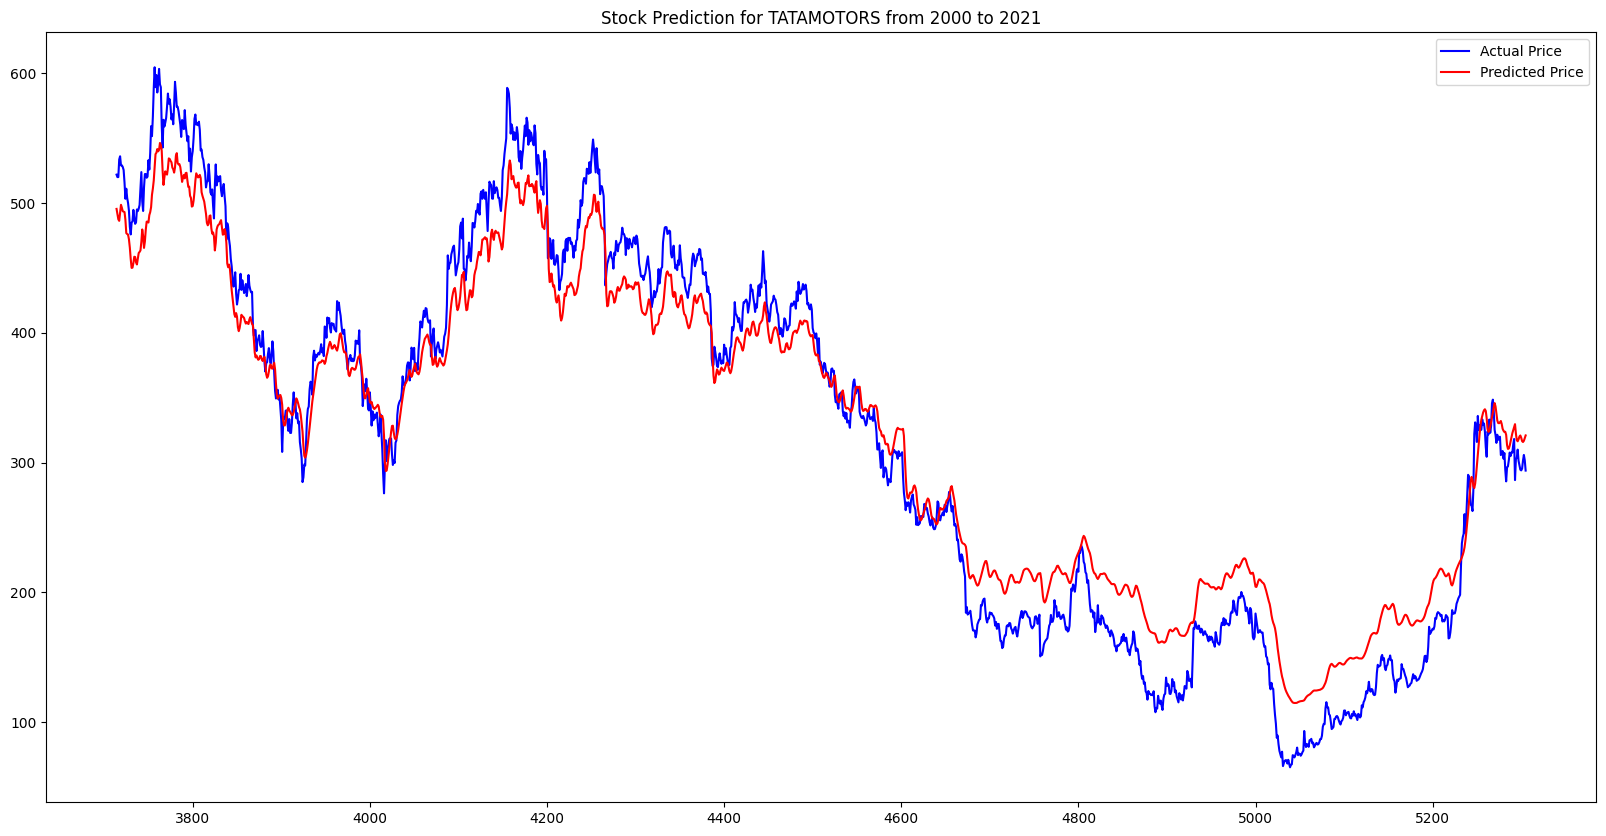

In [32]:
valid_data['Predictions']=predicted_closing_price
plt.plot(valid_data["Close"],"b",label ="Actual Price")
plt.plot(valid_data["Predictions"],"r",label = "Predicted Price")
plt.title(f"Stock Prediction for {filename_without_extension} from 2000 to 2021")
plt.legend()
plt.show()

In [33]:
# calculate MAE and RMSE
mae = mean_absolute_error(y_test_arr, predicted_closing_price)
rmse = np.sqrt(mean_squared_error(y_test_arr, predicted_closing_price))
print('MAE: %.2f' % mae)
print('RMSE: %.2f' % rmse)

MAE: 323.25
RMSE: 343.43
